<a href="https://colab.research.google.com/github/NehaNeha417/loan_prediction/blob/master/GTSRB_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2


print(tf.__version__)
print(os.listdir('/content/drive/My Drive/Data/Train'))

2.3.0
['4', '3', '2', '1', '0']


In [2]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
num = 5
n_inputs = height*width*channels

for i in range(num):
  path = '/content/drive/My Drive/Data/Train/{0}'.format(i)
  print(path)
  cl = os.listdir(path)
  for a in cl:
   
      img = cv2.imread(path+'/'+a) 
      img_arr = Image.fromarray(img,'RGB')
      img_size = img_arr.resize((30,30))
      data.append(np.array(img_size))
      labels.append(i)
    
    



/content/drive/My Drive/Data/Train/0
/content/drive/My Drive/Data/Train/1
/content/drive/My Drive/Data/Train/2
/content/drive/My Drive/Data/Train/3
/content/drive/My Drive/Data/Train/4


In [6]:
x_train = np.array(data)
x_train = x_train/255.0

y_train = np.array(labels)
y_train = to_categorical(y_train, num)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(5649, 30, 30, 3)
(2421, 30, 30, 3)



Size of image(30, 30, 3)
Class of image[0. 0. 0. 0. 1.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[1. 0. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[0. 0. 0. 0. 1.]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

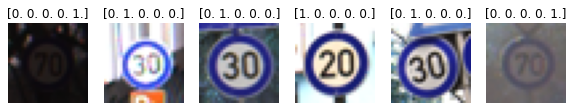

In [20]:
import matplotlib.pyplot as plt


def show_image(data, labels, no):
  fig, axes = plt.subplots(1, no, figsize=(10,10))
  axes = axes.ravel()
  for i in np.arange(0,no):
    k = int(random.random() * len(data))
    axes[i].axis("off")
    axes[i].imshow(data[k])
    axes[i].set_title(labels[k])
    print()
    #plt.title(labels[k])
    print('Size of image' +str(data[k].shape))
    print('Class of image' +str(labels[k]))
plt.subplots_adjust(hspace=0.4)
show_image(X_train, Y_train, 6)


In [25]:
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(X_train.shape[1:]))) 
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
epochs=10
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=epochs, verbose=1)

Epoch 1/10
177/177 [==============================] - 29s 165ms/step - loss: 0.1622 - accuracy: 0.9487 - val_loss: 0.0504 - val_accuracy: 0.9855
Epoch 2/10
177/177 [==============================] - 29s 166ms/step - loss: 0.0775 - accuracy: 0.9777 - val_loss: 0.0201 - val_accuracy: 0.9930
Epoch 3/10
177/177 [==============================] - 29s 166ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0140 - val_accuracy: 0.9959
Epoch 4/10
177/177 [==============================] - 29s 167ms/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 0.0119 - val_accuracy: 0.9971
Epoch 5/10
177/177 [==============================] - 30s 167ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0116 - val_accuracy: 0.9967
Epoch 6/10
177/177 [==============================] - 29s 166ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0087 - val_accuracy: 0.9971
Epoch 7/10
177/177 [==============================] - 29s 165ms/step - loss: 0.0153 - accuracy: 0.9947 - val_loss: 0.0178 - val_ac

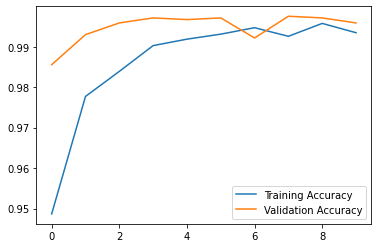

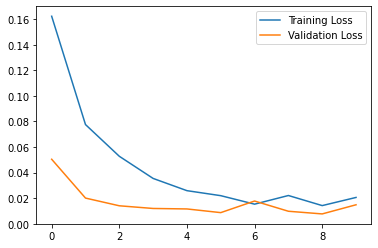

In [36]:

accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
plt.figure(0)
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.figure(1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()

plt.show()

In [38]:
model.save_weights('/content/drive/My Drive/Data/GTSRB_wt.hdf5')

In [57]:
test_df = pd.read_csv("/content/drive/My Drive/Data/Test.csv")
img = test_df['Path'].values
labels = test_df['ClassId'].values
path = '/content/drive/My Drive/Data/Test'

data=[]
cls = os.listdir(path)
for i in cls:

  image = cv2.imread(path+'/'+i)
  image_arr = Image.fromarray(image, 'RGB')
  image_size = image_arr.resize((30,30))
  data.append(np.array(image_size))

X_test = np.array(data)
X_test = X_test.astype('float32')/255.0
Y_pred = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,Y_pred))

0.045454545454545456


In [63]:
#(loss, acc) = model.evaluate(X_test, labels, batch_size=32, verbose=1 )